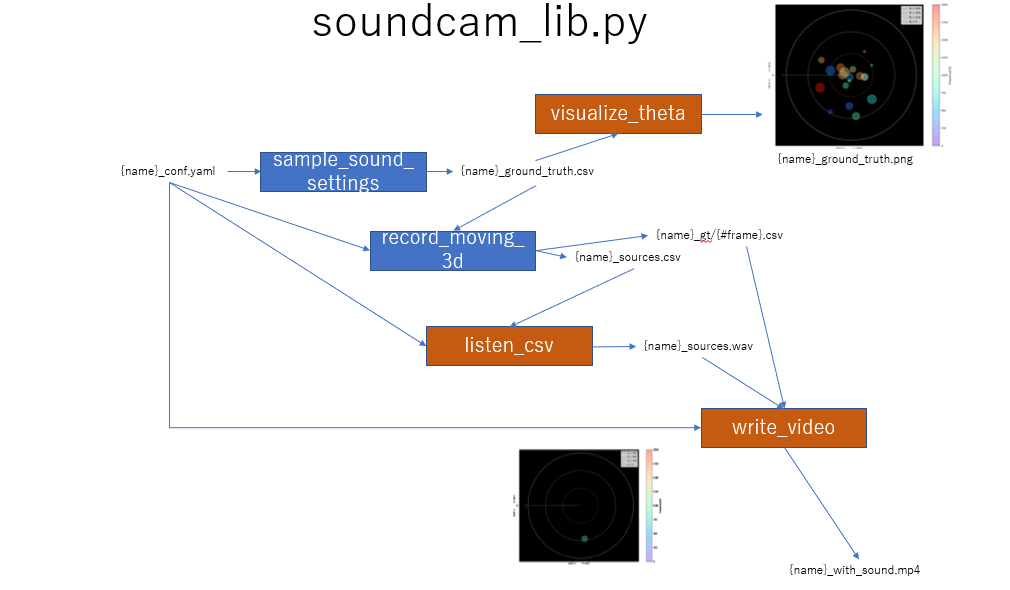

## issues
- [ ] unify interface (input and output) to only requireing filenames path
- [ ] describe each dataformat

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
sys.path.append("../scripts")

## check environment
- You need also **ffmpeg**
> apt install ffmpeg

In [18]:
pip freeze

argon2-cffi==21.1.0
attrs==19.3.0
Automat==0.8.0
backcall==0.2.0
bleach==4.1.0
blinker==1.4
Brotli==1.0.9
certifi==2019.11.28
cffi==1.15.0
chardet==3.0.4
click==8.0.3
cloud-init==21.3
colorama==0.4.3
command-not-found==0.3
configobj==5.0.6
constantly==15.1.0
cryptography==2.8
cycler==0.10.0
dash==2.0.0
dash-core-components==2.0.0
dash-html-components==2.0.0
dash-table==5.0.0
dbus-python==1.2.16
debugpy==1.5.0
decorator==4.4.2
defusedxml==0.7.1
distro==1.4.0
distro-info===0.23ubuntu1
entrypoints==0.3
Flask==2.0.2
Flask-Compress==1.10.1
gensim==4.1.2
httplib2==0.14.0
hyperlink==19.0.0
idna==2.8
imageio==2.9.0
imageio-ffmpeg==0.4.5
importlib-metadata==1.5.0
incremental==16.10.1
ipykernel==6.4.1
ipython==7.28.0
ipython-genutils==0.2.0
ipywidgets==7.6.5
itsdangerous==2.0.1
jedi==0.18.0
Jinja2==3.0.2
joblib==1.1.0
jsonpatch==1.22
jsonpointer==2.0
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==7.0.6
jupyter-console==6.4.0
jupyter-core==4.8.1
jupyterlab-pygments==0.1.2
jupyterlab-widgets==1.

## creating a yaml file

In [59]:
import yaml
import math

data_name = "usagedir/mukai"
conf = dict(
    data_name = data_name,# データ名
    v_sound = 340*1000, # 音速[mm/sec]
    sample_frq = 40 *1000,# サンプリング周波数sps #defo 40k
    sample_bit = 16, # 量子化bit数defo 16
    record_len = 10.0,# 録音する音源の長さ[sec]
    mic = dict(
        mic1 = dict(
            x = 0.0,
            y = 50.0,
            z = 0.0,
            ),
        mic2 = dict(
            x = -50.0,
            y = 0.0,
            z = 0.0,                
            ),
        mic3 = dict(
            x = 50.0,
            y = 0.0,
            z = 0.0,                
            ),
        mic4 = dict(
            x = 0.0,
            y = -50.0,
            z = 0.0,                
            ),
        ),
    interval = 0.1, # mp4のフレームレート、gtもこれに合わせて保存
    random_seed = 40, # 音源をランダムに作る時のseed
    N_src = 2, # 音源の数
    s_frq = [100,2000],# 音源の周波数
    s_r = [100,3000], # 音源の原点からの距離
    s_th = [0,3*math.pi/4], # 音源の方向の範囲
    omega = [-1*math.pi/2,1*math.pi/2,],# 音源回転の角速度[rad/sec]
    margin_rate = 0.2 #量子化する時にどれだけ余白を開けるか
)

## and save it 
with open(f'{conf["data_name"]}_conf.yaml', "w") as f:
    yaml.dump(conf, f)
## and read it
#conf = yaml.load(open(f'{data_name}_conf.yaml'), Loader=yaml.FullLoader)

## sampling src settings

In [60]:
from soundcam_lib import sample_sound_settings
gt_list = sample_sound_settings(conf)

## and save it 
#import csv
with open(f'{conf["data_name"]}_ground_truth.csv', 'w', newline="") as f:
    writer = csv.writer(f)
    writer.writerows(gt_list)
## and read it
#with open(f'{conf["data_name"]}_ground_truth.csv') as f:
#    reader = csv.reader(f)
#    gt_list = [row for row in reader]

In [68]:
with open(f'{conf["data_name"]}_ground_truth.csv') as f:
    reader = csv.reader(f)
    gt_list = [row for row in reader]

## show first one frame

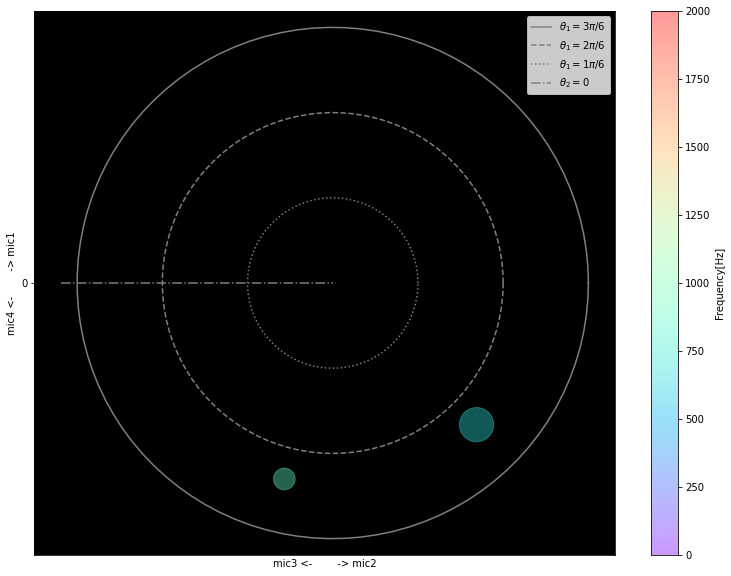

In [72]:
from soundcam_lib import visualize_theta
visualize_theta(f'{conf["data_name"]}_ground_truth.csv')

## recording

In [69]:
from soundcam_lib import record_moving_3d 
spls = record_moving_3d(conf,gt_list)
   
## and save it 
with open(f'{conf["data_name"]}_sources.csv', 'w', newline="") as f:
    writer = csv.writer(f)
    writer.writerows([[f"ch{i}" for i in range(1,5)]]+list(spls))

## making wav

In [70]:
from soundcam_lib import listen_csv
listen_csv(f'{data_name}_conf.yaml')

## making mp4

Moviepy - Building video usagedir/mukai_with_sound.mp4.
Moviepy - Writing video usagedir/mukai_with_sound.mp4



Moviepy - Done !
Moviepy - video ready usagedir/mukai_with_sound.mp4


<Figure size 432x288 with 0 Axes>

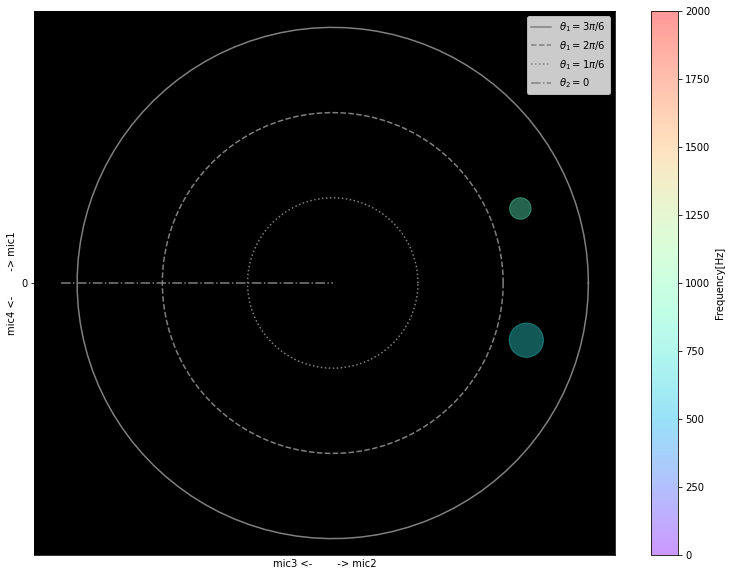

In [71]:
from soundcam_lib import write_video
write_video(nm=data_name)